In [1]:
# -*- coding: utf-8 -*-
from pylab import*
import matplotlib.pyplot as plt
from numpy import*
from matplotlib.pyplot import*
import pandas as pd


In [2]:
data = pd.read_csv("exp_data/lambda_jet_global.dat", delimiter=r"\s+", header=0, engine='python') 

In [3]:
coef=0.25

tau=0.2

In [4]:
#data


In [5]:
Q=10.58
mh=1.115
data['yp']=np.log( data['z1']*Q/np.sqrt(data['pt']**2 + mh**2) )

In [6]:
data['rs']=(data['pt']/data['z1']/Q)*np.exp(-data['yp'])

In [7]:
data['rc'] = data['z1']*(1-data['z1'])*np.exp(-2*data['yp'])

In [8]:
data['qt_Q']=(data['pt']/data['z1']/Q)

In [9]:
data['exp']=np.exp(-data['yp'])

In [10]:
#data

In [11]:

dr_pr2=data.loc[(data['rs']>coef*tau)]
dr_pr1=data.loc[(data['rs']<coef*tau)]

In [12]:
df_R1=dr_pr1.loc[(data['qt_Q'] <coef*data['exp'])]

In [13]:
#df_R1

In [14]:
df_R2=dr_pr1.loc[(data['qt_Q'] >coef*data['exp'])]
#df_R2

In [15]:
df_R22 = dr_pr2.loc[(dr_pr2['rc']<coef*tau)]
#df_R22

In [16]:
df_R3 = dr_pr2.loc[(dr_pr2['rc']>coef*tau)]
#df_R3

In [17]:
df_RR2=df_R2

In [18]:
df_RR2=df_RR2.append(df_R22)

Plotter: con diversi colori in base alla regione

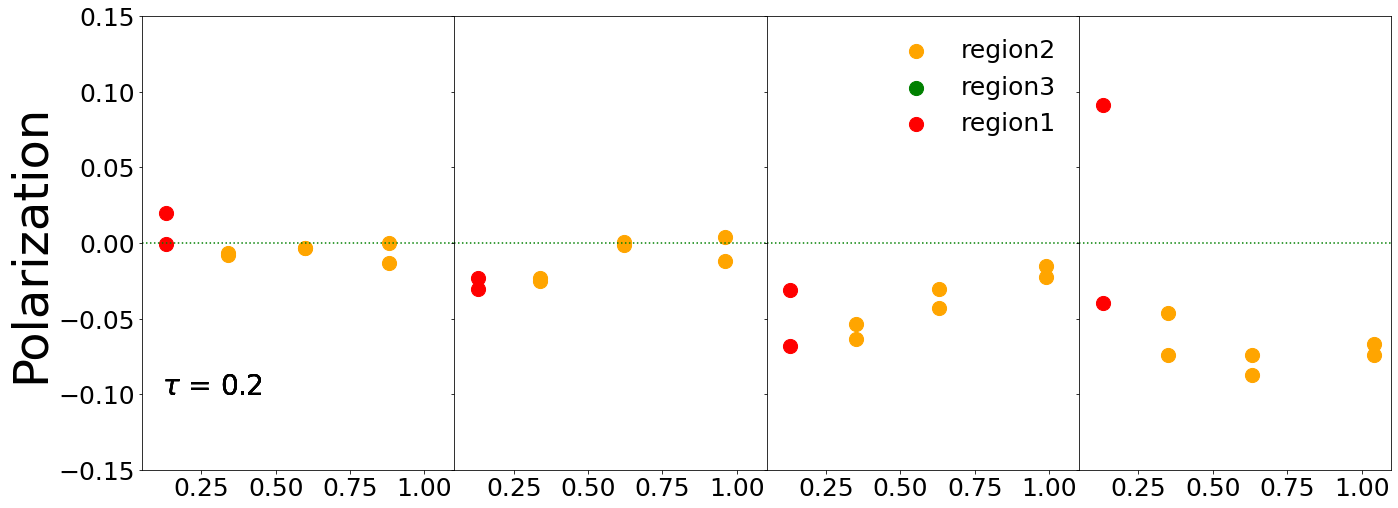

In [19]:
fig4, axes = plt.subplots(1,4)
lim=[-0.15,0.15]
z1=[0.25,.35,.45,.6]
ct=1
cl_r='orange'
cl_b='red'
cl_g='green'

ers_bar = 1.2  # dimensione barre errore
pnt_dat = 6 # dimensione punti

title_s=35 #dimensione titolo bin

fit_l=3.  # dimensione linea fit
y_lbl=48
x_lbl =50
size_m=200
for zs, ax in zip(z1,axes):

    lim=[-0.15,0.15]

    #fig4.suptitle('$\Lambda$ - thrust coef ')
    pnt1 = df_RR2.loc[(df_RR2['h1']==300) & (df_RR2['z1']< zs+0.05) & (df_RR2['z1']> zs-0.05)]  
    pnt2 = df_RR2.loc[(df_RR2['h1']==310) & (df_RR2['z1']< zs+0.05) & (df_RR2['z1']> zs-0.05)] 
#
    pnt11 = df_R3.loc[(df_R3['h1']==300) & (df_R3['z1']< zs+0.05) & (df_R3['z1']> zs-0.05)]  
    pnt22 = df_R3.loc[(df_R3['h1']==310) & (df_R3['z1']< zs+0.05) & (df_R3['z1']> zs-0.05)] 
#    
    pnt111 = df_R1.loc[(df_R1['h1']==300) & (df_R1['z1']< zs+0.05) & (df_R1['z1']> zs-0.05)]  
    pnt222 = df_R1.loc[(df_R1['h1']==310) & (df_R1['z1']< zs+0.05) & (df_R1['z1']> zs-0.05)] 
    
#    pnt1.astype(float)
#    pnt2.astype(float)
    ax=plt.subplot(1,4,ct)
    ax.scatter(pnt1.pt, pnt1.P_exp, s=size_m ,  color=cl_r,label= 'region2')
    ax.scatter(pnt2.pt, pnt2.P_exp,    s=size_m ,color=cl_r, label= '_region2')
    ax.scatter(pnt11.pt, pnt11.P_exp,    s=size_m ,color=cl_g,label= 'region3')
    ax.scatter(pnt22.pt, pnt22.P_exp,    s=size_m ,color=cl_g, label= '_region3')
    ax.scatter(pnt111.pt, pnt111.P_exp,    s=size_m ,color=cl_b,label= 'region1')
    ax.scatter(pnt222.pt, pnt222.P_exp,s=size_m ,    color=cl_b, label= '_region1')

    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.locator_params(nbins=5, axis='x')
    #ax.xticks(np.arange(0.3, 0.75+.25, .2))
    ax.set_xlim([0.05,1.1])
#    if zs==0.25 :	title("0.2<$z_{\Lambda}$<0.3  ",fontsize=title_s,x=0.5, y=1.)
#    elif zs==0.35 :	title("0.3<$z_{\Lambda}$<0.4",fontsize=title_s,x=0.5, y=1.)
#    elif zs==0.45 :	title("0.4<$z_{\Lambda}$<0.5",fontsize=title_s,x=0.5, y=1.)
#    elif zs==0.6 :	title("0.5<$z_{\Lambda}$<0.9",fontsize=title_s,x=0.5, y=1.)

    if ct==1 : ylabel('Polarization',size=y_lbl)
    if ct ==3 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False),
    if ct !=1 :ax.set_yticklabels([])
    axhline(linewidth=1.5, ls=':', color='g')
    fig4.text(0.15, 0.3, r'$\tau$ = '+str(tau), ha='center',size=28)
    ax.set_ylim(lim)
    ct+=1
    
fig4.subplots_adjust(top=0.8,bottom=0.2,left=0.1,right=0.99,hspace=0.2,wspace=0.0)

fig4.set_size_inches(19.5, 10.5, forward=True)
fig4.savefig('plot_regions_andrea/regione_lambda_thrust_tau_'+str(tau)+'_.png')
#   

# Selezione come chiesto da Andrea


In [20]:
data = pd.read_csv("exp_data/lambda_jet_global.dat", delimiter=r"\s+", header=0, engine='python') 
data


,h1,jet,z1,pt,P_exp,P(theo),err,unpol
0,300,999,0.25,0.13,0.0198,-0.007436,0.007212,0.155700
1,300,999,0.25,0.34,-0.0078,-0.014850,0.002837,0.095040
2,300,999,0.26,0.60,-0.0033,-0.012880,0.003579,0.025860
3,300,999,0.28,0.88,-0.0134,-0.006057,0.009888,0.002765
4,300,999,0.34,0.13,-0.0301,-0.011510,0.014370,0.072870
5,300,999,0.35,0.34,-0.0251,-0.025610,0.003803,0.040780
6,300,999,0.35,0.62,0.0004,-0.022420,0.004569,0.010640
7,300,999,0.35,0.96,-0.0117,-0.008008,0.006981,0.000725
8,300,999,0.44,0.13,-0.0683,-0.027700,0.028430,0.031680
9,300,999,0.44,0.35,-0.0534,-0.055900,0.007215,0.018680


In [21]:
dt_and=data.loc[(data['z1']>0.3)]
dt_and=dt_and.loc[(dt_and['pt']<0.15*10.58)]
dt_and

,h1,jet,z1,pt,P_exp,P(theo),err,unpol
4,300,999,0.34,0.13,-0.0301,-0.011510,0.014370,0.072870
5,300,999,0.35,0.34,-0.0251,-0.025610,0.003803,0.040780
6,300,999,0.35,0.62,0.0004,-0.022420,0.004569,0.010640
7,300,999,0.35,0.96,-0.0117,-0.008008,0.006981,0.000725
8,300,999,0.44,0.13,-0.0683,-0.027700,0.028430,0.031680
9,300,999,0.44,0.35,-0.0534,-0.055900,0.007215,0.018680
10,300,999,0.45,0.63,-0.0431,-0.050340,0.008165,0.004378
11,300,999,0.45,0.99,-0.0228,-0.016090,0.010300,0.000237
12,300,999,0.59,0.13,-0.0398,-0.046710,0.047650,0.008537
13,300,999,0.59,0.35,-0.0466,-0.094260,0.014770,0.005035
